# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [ ]:
#

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Dataset/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data = data.drop(columns=['id'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.describe(include='all')
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
bmi,201


In [ ]:
less = missing_values[missing_values < 5110].index
over = missing_values[missing_values >= 5110].index

In [ ]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = data[less].select_dtypes(include=['number']).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].median())

In [ ]:
# Contoh mengisi nilai yang hilang dengan median untuk kolom kategori
kategorical_features = data[less].select_dtypes(include=['object']).columns

for column in kategorical_features:
    data[column] = data[column].fillna(data[column].mode()[0])

In [ ]:
# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = data.drop(columns=over)

In [ ]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


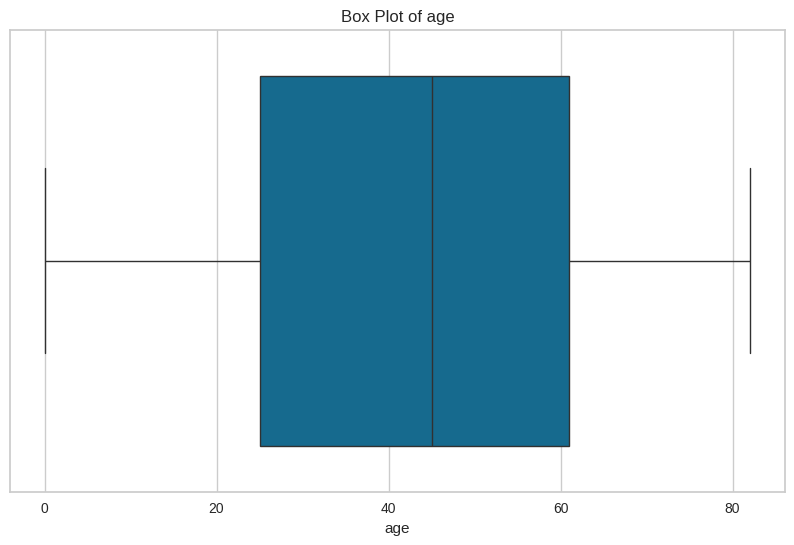

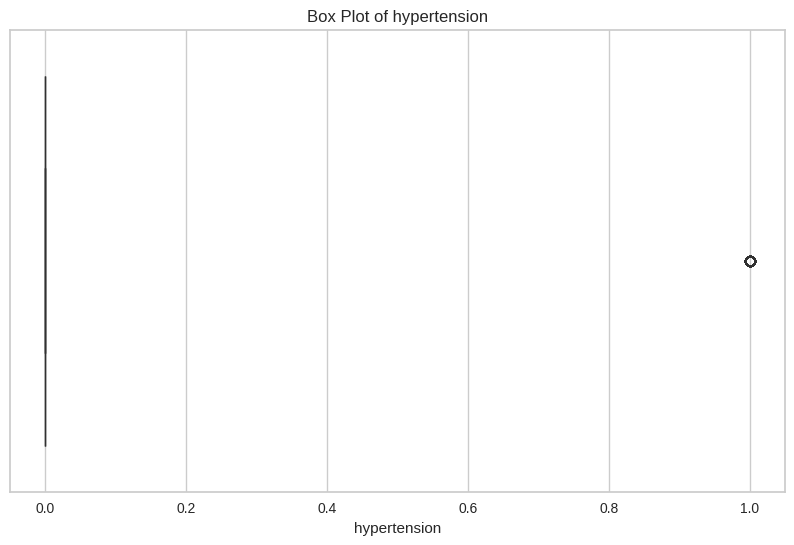

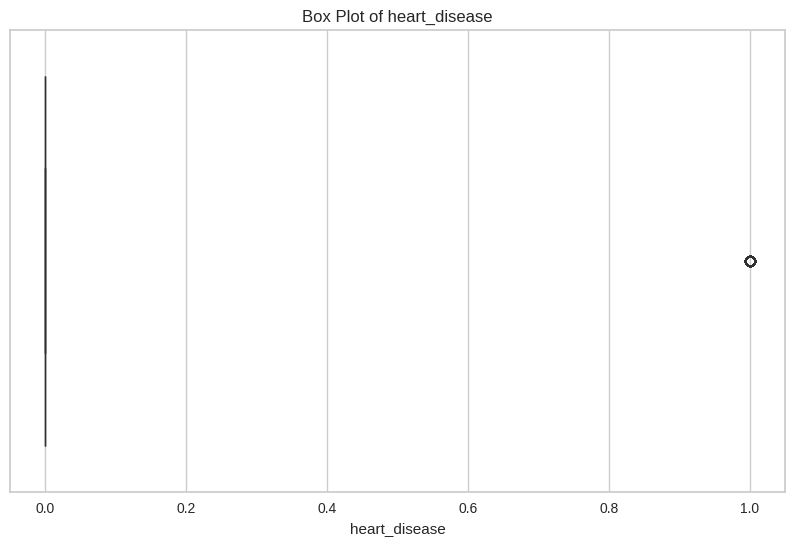

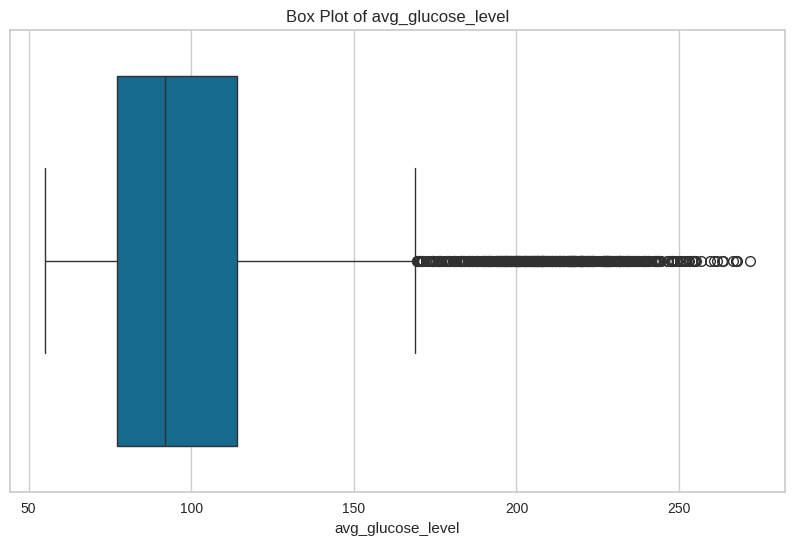

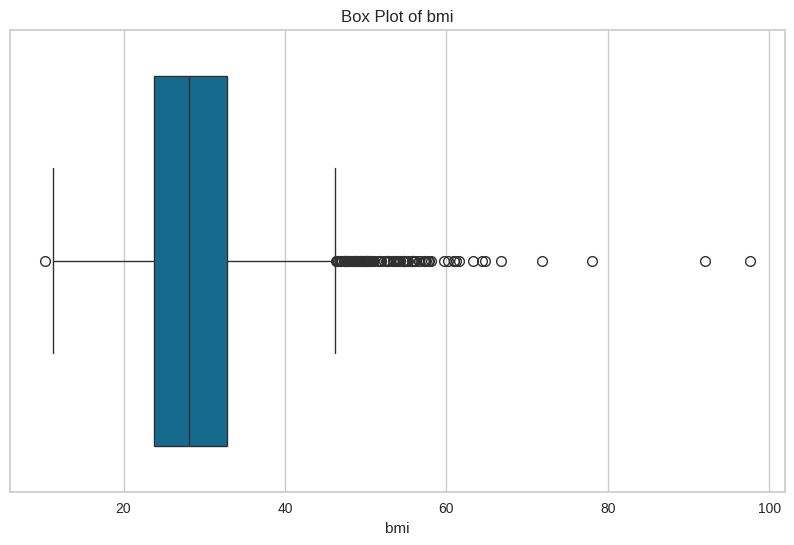

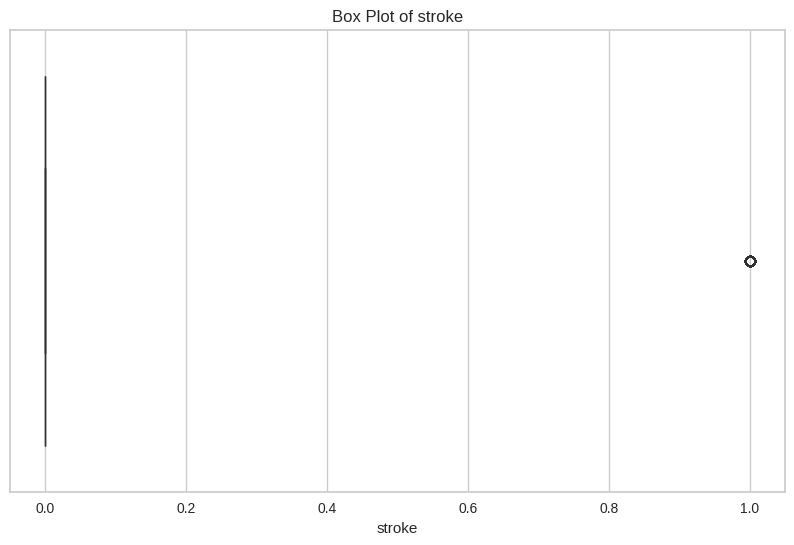

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (data[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
data_filtered_numeric = data.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
data = pd.concat([data_filtered_numeric, data.loc[condition, kategorical_features]], axis=1)

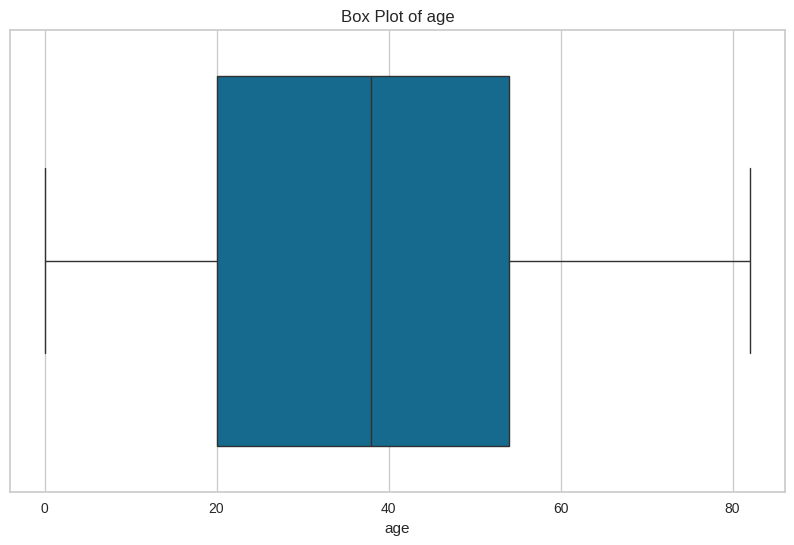

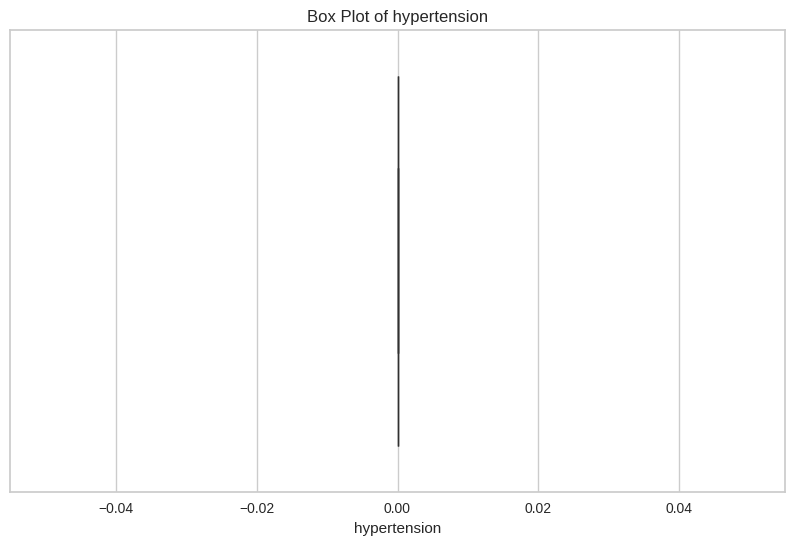

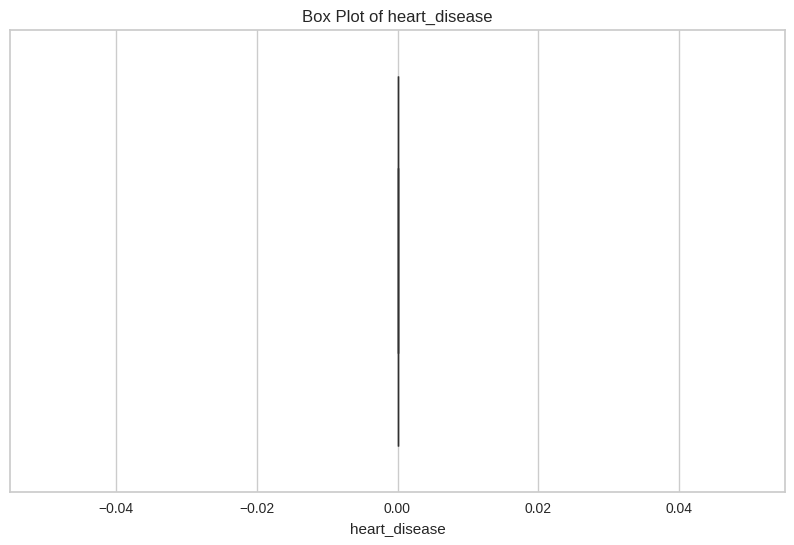

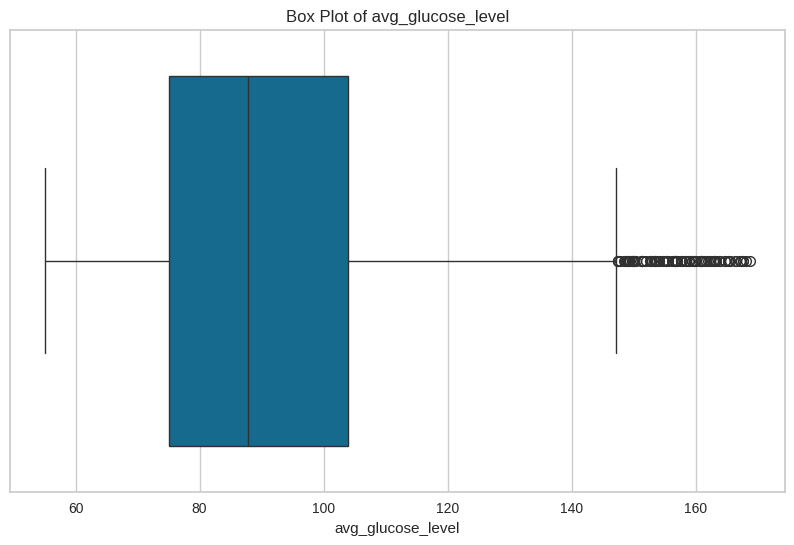

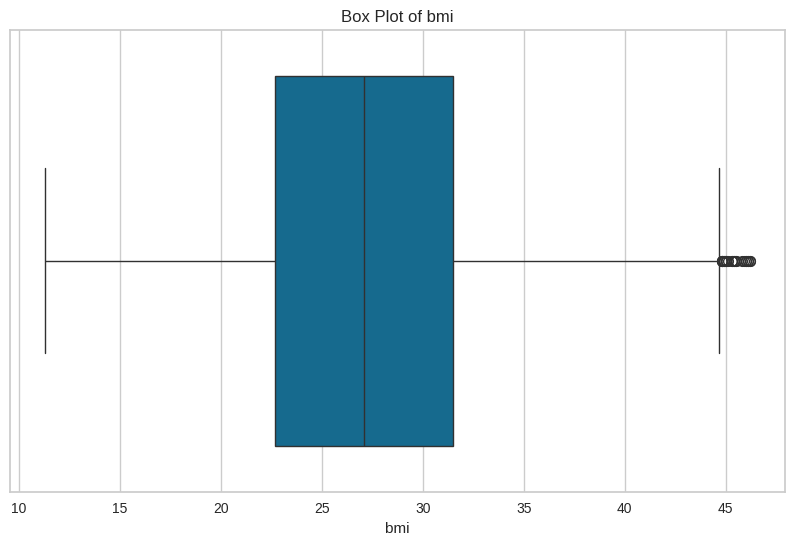

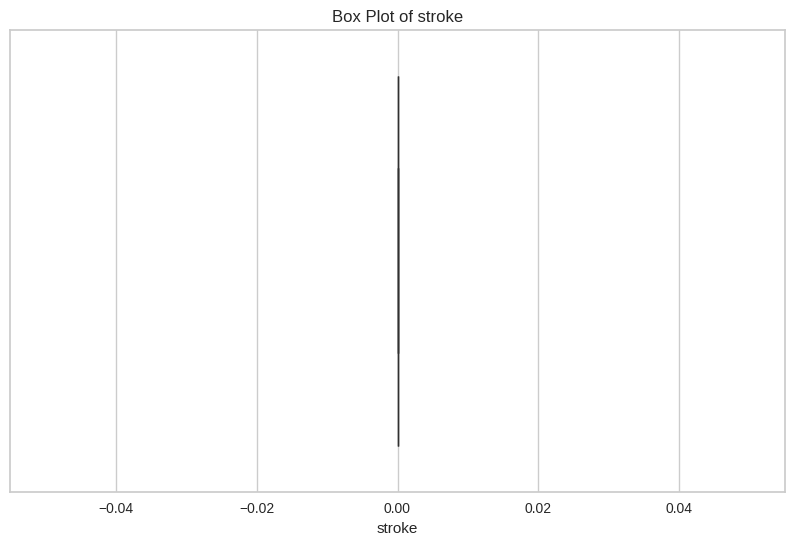

In [ ]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [ ]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage


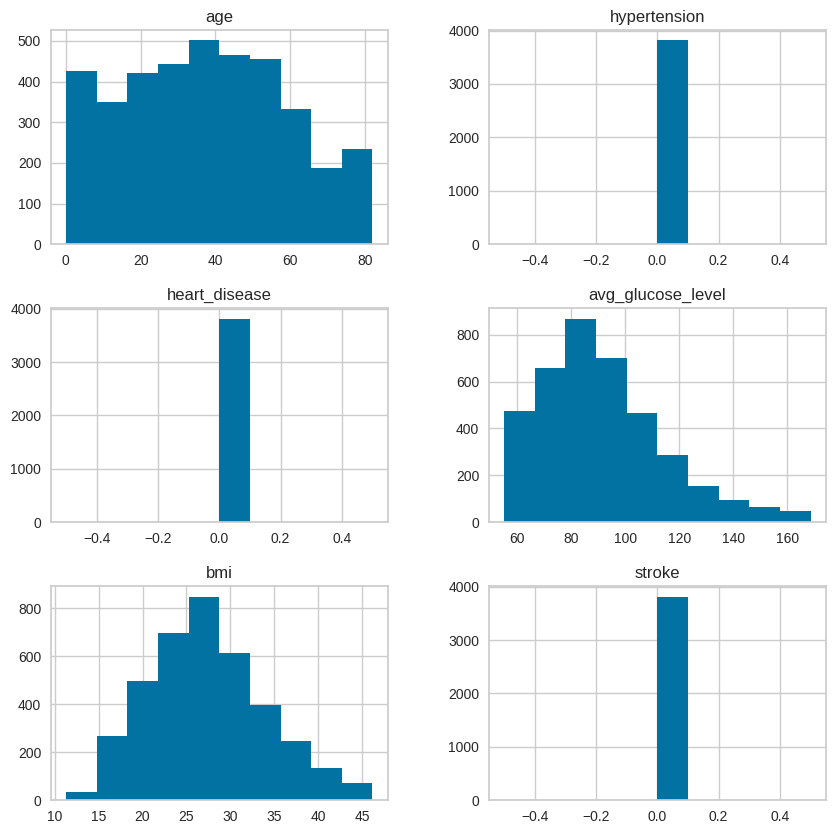

In [ ]:
data.hist(figsize=(10, 10))
plt.show()

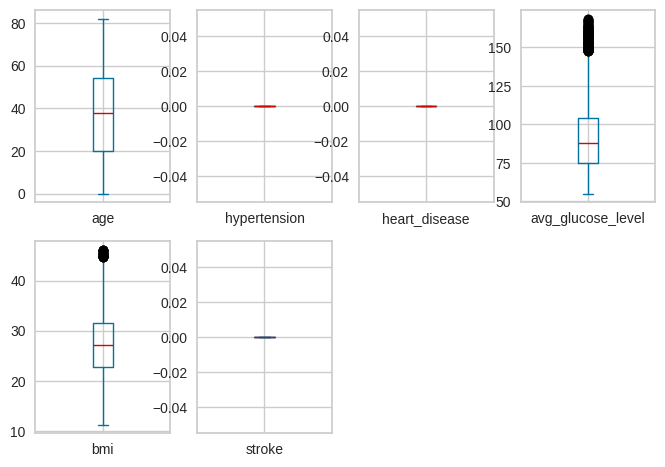

In [ ]:
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

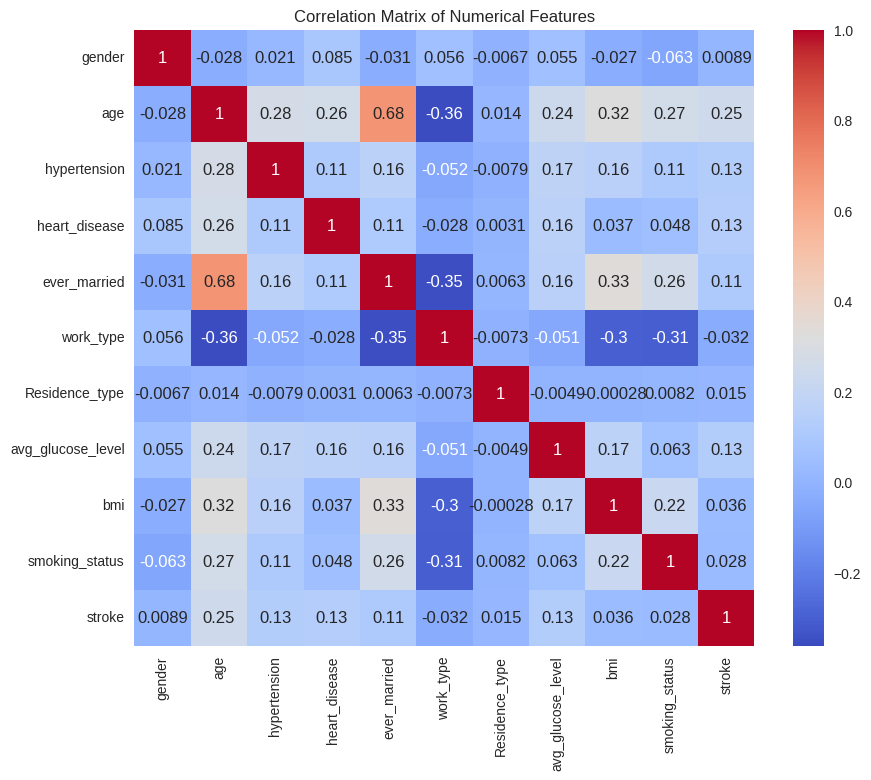

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_lencoder.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
df[numeric_features]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,28.1,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [ ]:
# Standardisasi fitur numerik
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[numeric_features])

Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

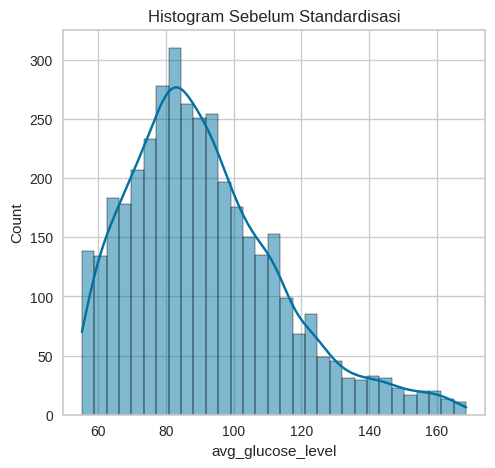

In [ ]:
# Histogram Sebelum Normalisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

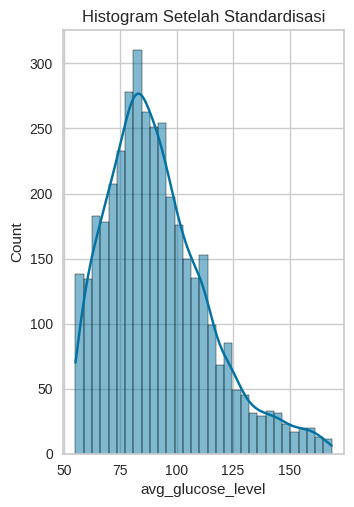

In [ ]:
# Histogram Setelah Normalisasi
plt.subplot(1, 2, 2)
sns.histplot(data[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [ ]:
# Mengidentifikasi baris duplikat
duplicates = data.duplicated()

print("Baris duplikat:")
print(data[duplicates])
df

Baris duplikat:
Empty DataFrame
Columns: [age, hypertension, heart_disease, avg_glucose_level, bmi, stroke, gender, ever_married, work_type, Residence_type, smoking_status]
Index: []


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
data_lencoder = pd.DataFrame(df)

for col in kategorical_features:
    # Reshape the Series to a 2D array with one column
    # The fit_transform method already returns a dense array when sparse=False
    data_lencoder[col] = label_encoder.fit_transform(data_lencoder[col])
# Menampilkan hasil
data_lencoder

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
# Menentukan jumlah bin yang diinginkan
#n_bins = 3  # Misalnya, membagi data ke dalam 3 kategori

# Melakukan equal-frequency binning
#df['age_Binned'] = pd.qcut(df['age'], q=n_bins, labels=["Young", "Middle-aged", "Old"])

# Menampilkan hasil
data_lencoder.info()
data_lencoder

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X = data_lencoder[["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "smoking_status", "ever_married", "work_type", "gender", "Residence_type"]]
y = data_lencoder[["stroke"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data Latih (Fitur):")
print(X_train)
print("\nData Uji (Fitur):")
print(X_test)
print("\nData Latih (Target):")
print(y_train)
print("\nData Uji (Target):")
print(y_test)

Data Latih (Fitur):
        age  hypertension  heart_disease  avg_glucose_level   bmi  \
802   79.00             0              0             112.64  28.5   
3927  62.00             0              0              88.32  36.3   
2337  21.00             0              0              59.52  33.7   
3910  31.00             0              0              65.70  30.4   
1886  31.00             0              0              59.63  19.9   
...     ...           ...            ...                ...   ...   
4426  43.00             0              0              88.00  30.6   
466   61.00             1              0             170.05  60.2   
3092   1.16             0              0              97.28  17.8   
3772  80.00             0              0             196.08  31.0   
860   46.00             0              0             100.15  50.3   

      smoking_status  ever_married  work_type  gender  Residence_type  
802                1             1          3       1               0  
3927   

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
label_train = kmeans.labels_
print("Label cluster untuk data latih :", label_train)

Label cluster untuk data latih : [0 0 0 ... 0 1 0]


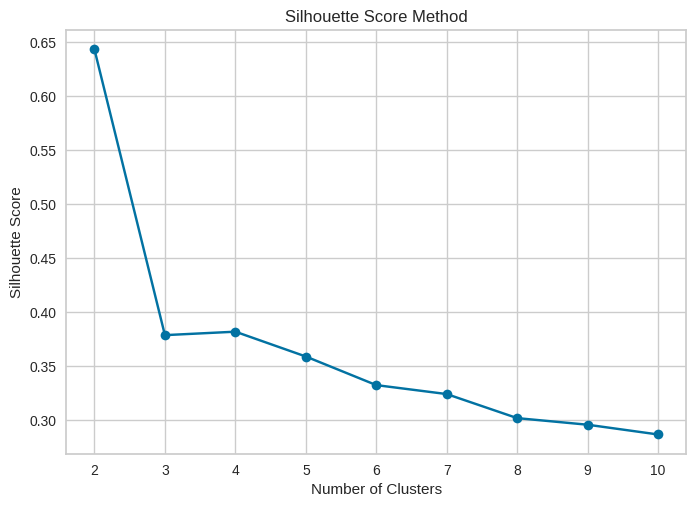

In [470]:
silhouette_scores = []
for i in range(2, 11):  # Minimal 2 cluster
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_lencoder)
    score = silhouette_score(data_lencoder, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
label_test = kmeans.predict(X_test)
print("Label cluster untuk data uji :", label_test)

Label cluster untuk data uji : [7 7 6 ... 8 9 3]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
score = silhouette_score(X_train, label_train)
print("Silhouette Score:", score)

Silhouette Score: 0.643918102027091


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


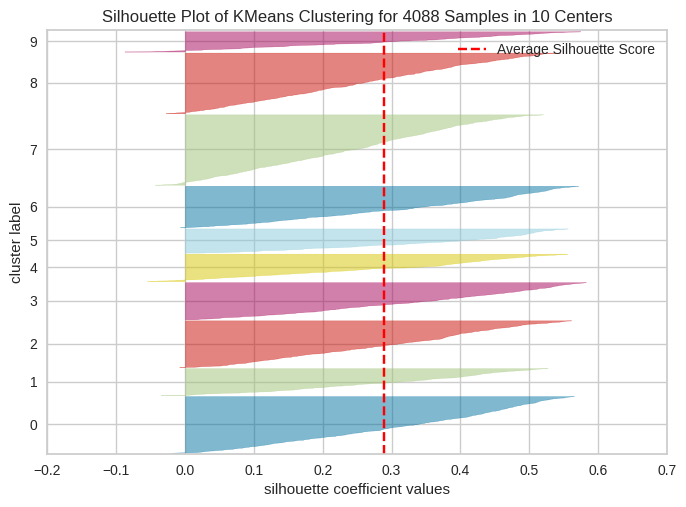

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4088 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_train)
visualizer.show()

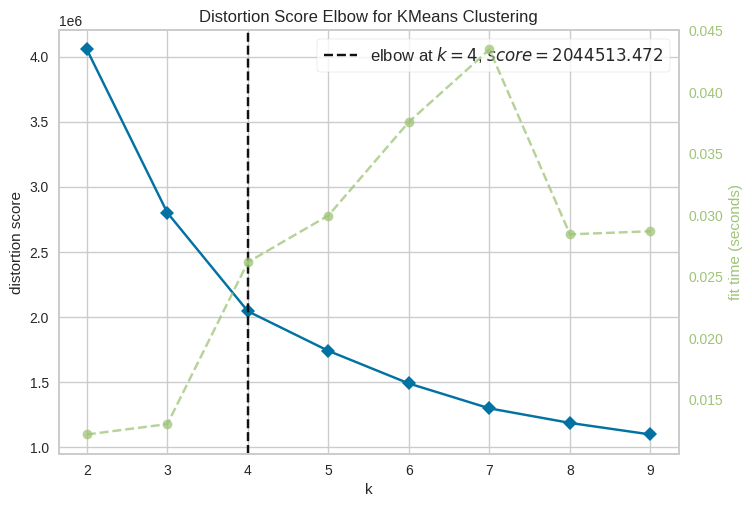

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_train)
visualizer.show()

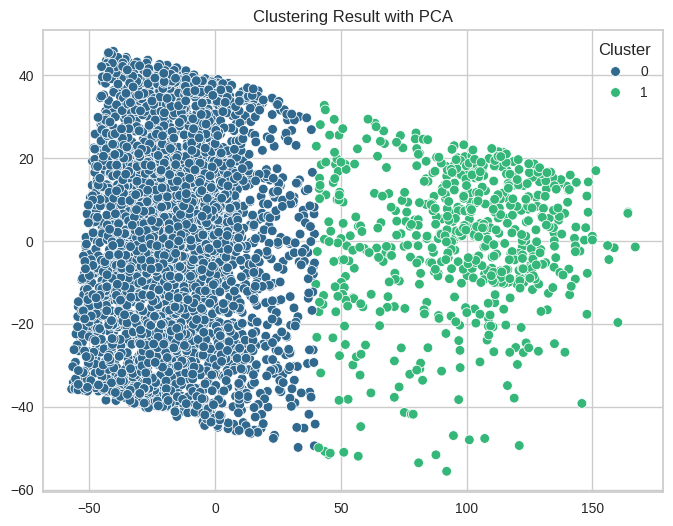

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)
plt.figure(figsize=(8, 6))

# Create a new DataFrame for the training data with the cluster labels
train_data_with_clusters = X_train.copy()  # Create a copy of X_train
train_data_with_clusters['Cluster'] = label_train

# Now use the new DataFrame for the scatter plot
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=train_data_with_clusters['Cluster'], palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
for cluster_label in train_data_with_clusters['Cluster'].unique():
    # Filter train_data_with_clusters to get data points in the current cluster
    cluster_data_points = train_data_with_clusters[train_data_with_clusters['Cluster'] == cluster_label]

    print(f"\nKarakteristik Cluster {cluster_label}:")
    print(cluster_data_points.describe())  # Statistik deskriptif

    # Get the original indices of the data points in this cluster
    original_indices = cluster_data_points.index

    # Calculate the average stroke for the current cluster using the original indices to access the target variable in y_train
    avg_stroke = y_train.loc[original_indices, 'stroke'].mean()
    print(f"Rata-rata stroke di cluster {cluster_label}: {avg_stroke}")


Karakteristik Cluster 0:
               age  hypertension  heart_disease  avg_glucose_level  \
count  3476.000000   3476.000000    3476.000000        3476.000000   
mean     40.659965      0.068182       0.037399          89.570285   
std      22.308109      0.252094       0.189766          20.158286   
min       0.160000      0.000000       0.000000          55.120000   
25%      23.000000      0.000000       0.000000          74.360000   
50%      41.000000      0.000000       0.000000          87.045000   
75%      57.000000      0.000000       0.000000         102.405000   
max      82.000000      1.000000       1.000000         153.310000   

               bmi  smoking_status  ever_married    work_type       gender  \
count  3476.000000     3476.000000   3476.000000  3476.000000  3476.000000   
mean     28.295339        1.345224      0.618239     2.189298     0.400460   
std       7.612797        1.086706      0.485888     1.109727     0.490062   
min      10.300000        0.000

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [471]:
data_lencoder.to_csv('hasil_clustering.csv', index=False)